<a href="https://colab.research.google.com/github/tbeers615/DeepLearningProjects/blob/FoodVision/MilestoneProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1: Food Vision Big

See annotated version of this notebook on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb

## Check GPU

Google Colab offers free GPUs (thank you Google), however, not all of them are compatible with mixed precision training.

Google Colab offers:
* K80 (not compatible)
* P100 (not compatible)
* Tesla T4 (compatible)

Knowing this, in order to use mixed precision training we need access to a Tesla T4 (from within Google Colab) or if we're using our own hardware, our GPU needs a score of 7.0+ (see here: https://developer.nvidia.com/cuda-gpus).

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-be4d57cc-1187-8f16-84a3-64035adb80ad)


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-be4d57cc-1187-8f16-84a3-64035adb80ad)


## Get Helper Functions

In past modules, we've created a bunch of helper functions to do small tasks required for our notebooks.

Rather than rewrite lal of these, we can import a script and load them in from there.

The script we've got available can be found in GitHub: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-20 23:58:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-20 23:58:50 (93.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use TensorFlow Datasets to Download Data

If you want to get an overview of the TensorFlow Datasets (TFDS) read the guide: https://www.tensorflow.org/datasets/overview

In [ ]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [ ]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) # is our target dataset in the list of TFDS datasets?

True


In [ ]:
# Load in the data (takes 5-6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train","validation"],
                                             shuffle_files=False,
                                             as_supervised=True, # data gets returned in tuple format (data,label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteM297P3/food101-train.tfrecord


  0%|          | 0/75750 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incompleteM297P3/food101-validation.tfrecord


  0%|          | 0/25250 [00:00<?, ? examples/s]

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 Data From TensorFlow Datasets

To become one with our data, we want to find:

* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* do the labels match up with the class names?

In [ ]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Take one sample of the train data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

In [ ]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image datatype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
  """)

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 2))



TypeError: ignored

In [ ]:
# What does our image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[5.56763382e+01, 5.26763382e+01, 4.36763382e+01],
         [5.35456009e+01, 5.05456009e+01, 4.15456009e+01],
         [4.67595673e+01, 4.44024239e+01, 3.54655609e+01],
         ...,
         [1.29420624e+02, 1.20201828e+02, 1.28219635e+02],
         [1.33903366e+02, 1.19041718e+02, 1.20341087e+02],
         [1.33751694e+02, 1.14747192e+02, 1.06601395e+02]],

        [[5.49980888e+01, 5.29980888e+01, 4.09980888e+01],
         [5.22047157e+01, 5.02047157e+01, 3.82047157e+01],
         [4.70854568e+01, 4.50854568e+01, 3.30398598e+01],
         ...,
         [1.25946106e+02, 1.18432671e+02, 1.16421776e+02],
         [1.29692276e+02, 1.16602310e+02, 1.06535263e+02],
         [1.33775085e+02, 1.17302223e+02, 9.49028168e+01]],

        [[5.84308014e+01, 5.64308014e+01, 4.36674080e+01],
         [4.90621834e+01, 4.70621834e+01, 3.42987900e+01],
         [4.19929848e+01, 3.96658173e+01, 2.56804848e+01],
         ...,
         [

In [ ]:
# What are the min and max values of our image tensor?
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>)

TypeError: ignored

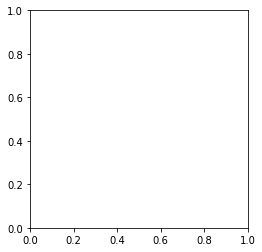

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # Add title to image to verify the label is correctly associated
plt.axis(False)
image.filepath()

## Create preprocessing functions for our data

Neural networks perform best when data is in a certain way (e.g. batched, normalized, etc.).

However, not all data (including data from TensorFlow datasets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing functions and map it to your data.

What we know about our data:
* In`uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, TensorFlow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 & 1) also called normalized tensors generally perform better

With these points in mind, we've got a few things we can tackle with a preprocessing function.

Since we're going to be using an EfficientNetBX pretrained model from tf.keras.applications we don't need to rescale our data (these architectures have rescaling built-in).

This means our functions needs to:
1. Reshape our images to all the same size
2. Conver the dtype of our image tensors from `uint8` to `float32`

In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
  """
  Converts image datatype from 'uint8' -> 'float32' and reshapaes
  image to [img_shape, img_shape, colour_channels]
  """
  image = tf.image.resize(image,[img_shape,img_shape]) # reshape target image
  return tf.cast(image,tf.float32),label # return(float32_image,label) tuple

In [ ]:
# Preprocess a single image and check the outputs
preprocessed_img = preprocess_img(image,label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape}, \nDatatype: {image.dtype}")
print(f"Image before preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape}, \nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[[ 52.714287  56.714287  59.714287]
   [ 48.739796  52.739796  53.739796]
   [ 45.85714   49.85714   50.85714 ]
   ...
   [202.93889  222.93889  233.93889 ]
   [206.35715  226.35715  237.35715 ]
   [211.17358  229.17358  241.17358 ]]

  [[ 48.214287  52.214287  55.214287]
   [ 42.57653   46.57653   49.57653 ]
   [ 37.05612   41.05612   42.05612 ]
   ...
   [204.44392  224.87245  235.87245 ]
   [204.93878  224.93878  233.93878 ]
   [205.92857  225.92857  234.92857 ]]

  [[ 35.428574  39.428574  42.428574]
   [ 30.443876  34.44388   37.44388 ]
   [ 26.428572  30.428572  32.663265]
   ...
   [202.50507  224.95404  233.5969  ]
   [207.34187  227.34187  234.77045 ]
   [210.21936  229.43364  236.86221 ]]

  ...

  [[122.36225  118.51023   94.93371 ]
   [120.168396 114.18371   88.75515 ]
   [ 98.00519   88.173584  61.173573]
   ...
   [200.00009  218.00009  232.00009 ]
   [205.4439   223.4439   237.4439  ]
   [211.36243  229.36243  243.36243 ]]

  [[125.49495  1

## Batch & Prepare Datasets

We're now going to make our data input pipeline run really fast.

For more resources on this, I'd highly suggest going through the following guide: https://www.tensorflow.org/guide/data_performance

In [ ]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img,num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:

* TensorBoard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save our model's progress after feature extraction

In [ ]:
# Create tensorboard callback (import from helper functions)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_acc",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0) # Don't print whether or not model is being saved

ModuleNotFoundError: ignored

## Setup mixed precision training

First and foremost, for a deeper understanding of mixed precision training, check out the TensorFlow guide for mixed precision:

https://www.tensorflow.org/guide/mixed_precision

Mixed precision utilizes a combination of float 32 and float 16

In [ ]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model doesn't you can do:
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # makes sure that layers which should be in inference mode only stay like that
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax",dtype=tf.float32,name="softmax_float32")(x)
model = tf.keras.Model(inputs,outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

16719872/16705208 [==============================] - 0s 0us/step


## Checking layer dtype policies (are we using mixed precision?)

In [ ]:
# Check the dtype_policy attributes of layers in our model

for layer in model.layers:
  print(f"Layer name:  {layer.name}\n Layer trainable: {layer.trainable}\n Layer datatype: {layer.dtype}\n Layer datatype policy:  {layer.dtype_policy}")

Layer name:  input_layer
 Layer trainable: True
 Layer datatype: float32
 Layer datatype policy:  <Policy "float32">
Layer name:  efficientnetb0
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  global_average_pooling2d
 Layer trainable: True
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  dense
 Layer trainable: True
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  softmax_float32
 Layer trainable: True
 Layer datatype: float32
 Layer datatype policy:  <Policy "float32">


Going through the above we see:

*`layer.name`: the human readable name of a particular layer<br>
*`layer.trainable`: is the layer trainable or not (if `False` then the weights are frozen<br>
*`layer.dtype`: the data type a layer stores its variables in<br>
*`layer.dtype_policy`: the data type policy a layer computes on its variables with

In [ ]:
# Check the layers in EfficientNetB0

for layer in base_model.layers:
    print(f"Layer name:  {layer.name}\n Layer trainable: {layer.trainable}\n Layer datatype: {layer.dtype}\n Layer datatype policy:  {layer.dtype_policy}")

Layer name:  input_1
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "float32">
Layer name:  rescaling
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  normalization
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  stem_conv_pad
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  stem_conv
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  stem_bn
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  stem_activation
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  block1a_dwconv
 Layer trainable: False
 Layer datatype: float32
 Layer datatype policy:  <Policy "mixed_float16">
Layer name:  bl

## Fit the Feature Extraction Model

If our goal is to fine-tune a pretrained model, the general order of doing things:
1. Build a feature extraction model (train a couple output layers with base layers frozen)
2. Fine-tune some of the frozen layers

In [ ]:
first_model = model.fit(train_data,
                    epochs=3,
                    steps_per_epoch = (len(train_data)),
                    validation_data=test_data,
                    validation_steps=int(0.15*len(test_data)),
                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                           experiment_name="efficientnetb0_101_classes_all_data"),
                               model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data/20220716-171453
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.8234 - accuracy: 0.5553WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 192s 73ms/step - loss: 1.8234 - accuracy: 0.5553 - val_loss: 1.2219 - val_accuracy: 0.6822
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2931 - accuracy: 0.6671WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 171s 72ms/step - loss: 1.2932 - accuracy: 0.6671 - val_loss: 1.1315 - val_accuracy: 0.6994
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1435 - accuracy: 0.7022WARNING:tensorflow:Can save best model only with val_acc available, skipping.


2368/2368 [==============================] - 174s 73ms/step - loss: 1.1435 - accuracy: 0.7022 - val_loss: 1.0786 - val_accuracy: 0.7161


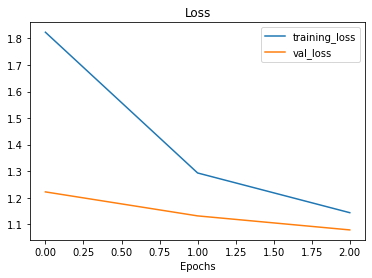

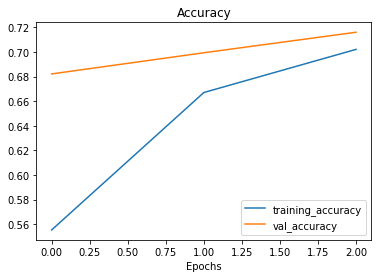

In [ ]:
plot_loss_curves(first_model)

In [ ]:
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 51s 64ms/step - loss: 1.0866 - accuracy: 0.7074


[1.0866411924362183, 0.7074059247970581]

##TODO:
* Save model locally (if you're using Google Colab, your saved model will Colab instance terminates)
* Load model previously saved above
* Check the layers in the base model and see what dtype policy they're using
* Check loaded model performance (this should be the same as results_feature_extract_model)
* The loaded model's results should equal (or at least be very close) to the model's results prior to saving
* **Note:** this will only work if you've instantiated results variables


In [ ]:
model.save("drive/MyDrive/Colab_Notebooks/firstMilestoneModel")

INFO:tensorflow:Assets written to: drive/MyDrive/Colab_Notebooks/firstMilestoneModel/assets


INFO:tensorflow:Assets written to: drive/MyDrive/Colab_Notebooks/firstMilestoneModel/assets


In [ ]:
loaded_model = tf.keras.models.load_model("drive/MyDrive/Colab_Notebooks/firstMilestoneModel")

In [ ]:
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 55s 65ms/step - loss: 1.0866 - accuracy: 0.7074


[1.0866405963897705, 0.7074059247970581]

In [ ]:
import tensorflow as tf
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2022-07-17 22:22:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M   102MB/s    in 0.2s    

2022-07-17 22:22:43 (102 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [ ]:
# Unzip the SavedModel downloaded from Google Storage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [ ]:
loaded_prebuiltmodel = tf.keras.models.load_model("downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [ ]:
# Model now loaded, evaluate:
loaded_prebuiltmodel.evaluate(test_data)

790/790 [==============================] - 63s 65ms/step - loss: 1.0881 - accuracy: 0.7065


[1.0881280899047852, 0.7064950466156006]

In [ ]:
# Summary of prebuilt model
loaded_prebuiltmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 pooling_layer (GlobalAverag  (None, 1280)             0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
# Unfreeze all layers in the prebuilt model
for layer in loaded_prebuiltmodel.layers:
  layer.trainable = True

In [ ]:
# Check dtype policy
for layer in loaded_prebuiltmodel.layers:
  print(layer.dtype_policy,layer.trainable)

<Policy "float32"> True
<Policy "mixed_float16"> True
<Policy "mixed_float16"> True
<Policy "mixed_float16"> True
<Policy "float32"> True


In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
# Monitor the val_loss and stop training if it doesn't improve for 3 epochs
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for more
# Create ModelCheckpoint callback to save a model's progress during training

early_stopping = tf.keras.callbacks.EarlyStopping(
                                   monitor='val_loss',
                                   patience=3,
                                   verbose=0
                               )


checkpoint_path = "unfrozen_model/cp.ckpt"
# Create ModelCheckpoint callback to save best model during fine-tuning
# Save the best model only
# Monitor val_loss while training and save the best model (lowest val_loss)
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint for more
model_checkpoint_loss = tf.keras.callbacks.ModelCheckpoint(
                                  checkpoint_path,
                                  monitor='val_loss',
                                  save_weights_only = True,
                                  save_best_only = True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# Compile the model
loaded_prebuiltmodel.compile(loss="sparse_categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(lr=0.0001), # learning rate lowered by 10%
                    metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Start to fine-tune (all layers)
# Use 100 epochs as the default
# Validate on 15% of the test_data
# Use the create_tensorboard_callback, ModelCheckpoint and EarlyStopping callbacks you created eaelier

unfrozen_model = loaded_prebuiltmodel.fit(train_data,
                    epochs=100,
                    steps_per_epoch = (len(train_data)),
                    validation_data=test_data,
                    validation_steps=int(0.15*len(test_data)),
                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                           experiment_name="unfrozen_model_Milestone"),
                               model_checkpoint_loss,
                               early_stopping,
                               reduce_lr])

Saving TensorBoard log files to: training_logs/unfrozen_model_Milestone/20220717-222630
Epoch 1/100
2368/2368 [==============================] - 356s 144ms/step - loss: 0.9211 - accuracy: 0.7525 - val_loss: 0.8407 - val_accuracy: 0.7614 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 343s 144ms/step - loss: 0.5789 - accuracy: 0.8401 - val_loss: 0.7969 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 341s 143ms/step - loss: 0.3290 - accuracy: 0.9077 - val_loss: 0.8412 - val_accuracy: 0.7892 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9483
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 340s 143ms/step - loss: 0.1746 - accuracy: 0.9483 - val_loss: 0.9323 - val_accuracy: 0.7855 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 335s 141ms/step - loss: 0.0

In [ ]:
loaded_prebuiltmodel.save("drive/MyDrive/Colab_Notebooks/unfrozenMilestoneModel")

INFO:tensorflow:Assets written to: drive/MyDrive/Colab_Notebooks/unfrozenMilestoneModel/assets


INFO:tensorflow:Assets written to: drive/MyDrive/Colab_Notebooks/unfrozenMilestoneModel/assets


In [ ]:
unfrozen_model_loaded = tf.keras.models.load_model("drive/MyDrive/Colab_Notebooks/unfrozenMilestoneModel")

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# we need to make some changes to our confusion_matrix function to ensure the x_labels print vertically
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed (plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip

--2022-07-20 23:59:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46790356 (45M) [application/zip]
Saving to: ‘07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  44.62M   107MB/s    in 0.4s    

2022-07-20 23:59:26 (107 MB/s) - ‘07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip’ saved [46790356/46790356]



In [ ]:
# Unzip fine-tuned model
!mkdir downloaded_fine_tuned_gs_model # create separate directory for fine-tuned model downloaded from Google Storage
!unzip /content/07_efficientnetb0_fine_tuned_101_classes_mixed_precision -d downloaded_fine_tuned_gs_model

Archive:  /content/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip
   creating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/
   creating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/variables/
  inflating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/variables/variables.index  
  inflating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/saved_model.pb  
   creating: downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/assets/


In [ ]:
import tensorflow as tf

# Load in fine-tuned model from Google Storage and evaluate
loaded_fine_tuned_gs_model = tf.keras.models.load_model("/content/downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [ ]:
# Make predictions with model
preds_probs = loaded_fine_tuned_gs_model.predict(test_data,verbose=1)

790/790 [==============================] - 64s 63ms/step


In [ ]:
y_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
pred_classes = preds_probs.argmax(axis=1)

In [ ]:
# To get our test labels we need to unravel our test_data BatchDataset
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy()) # currently test labels look like: [0 0, 0, 1, ... 0, 0], we want the index value where the "1" occurs
y_labels[:10] # look at the first 10

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

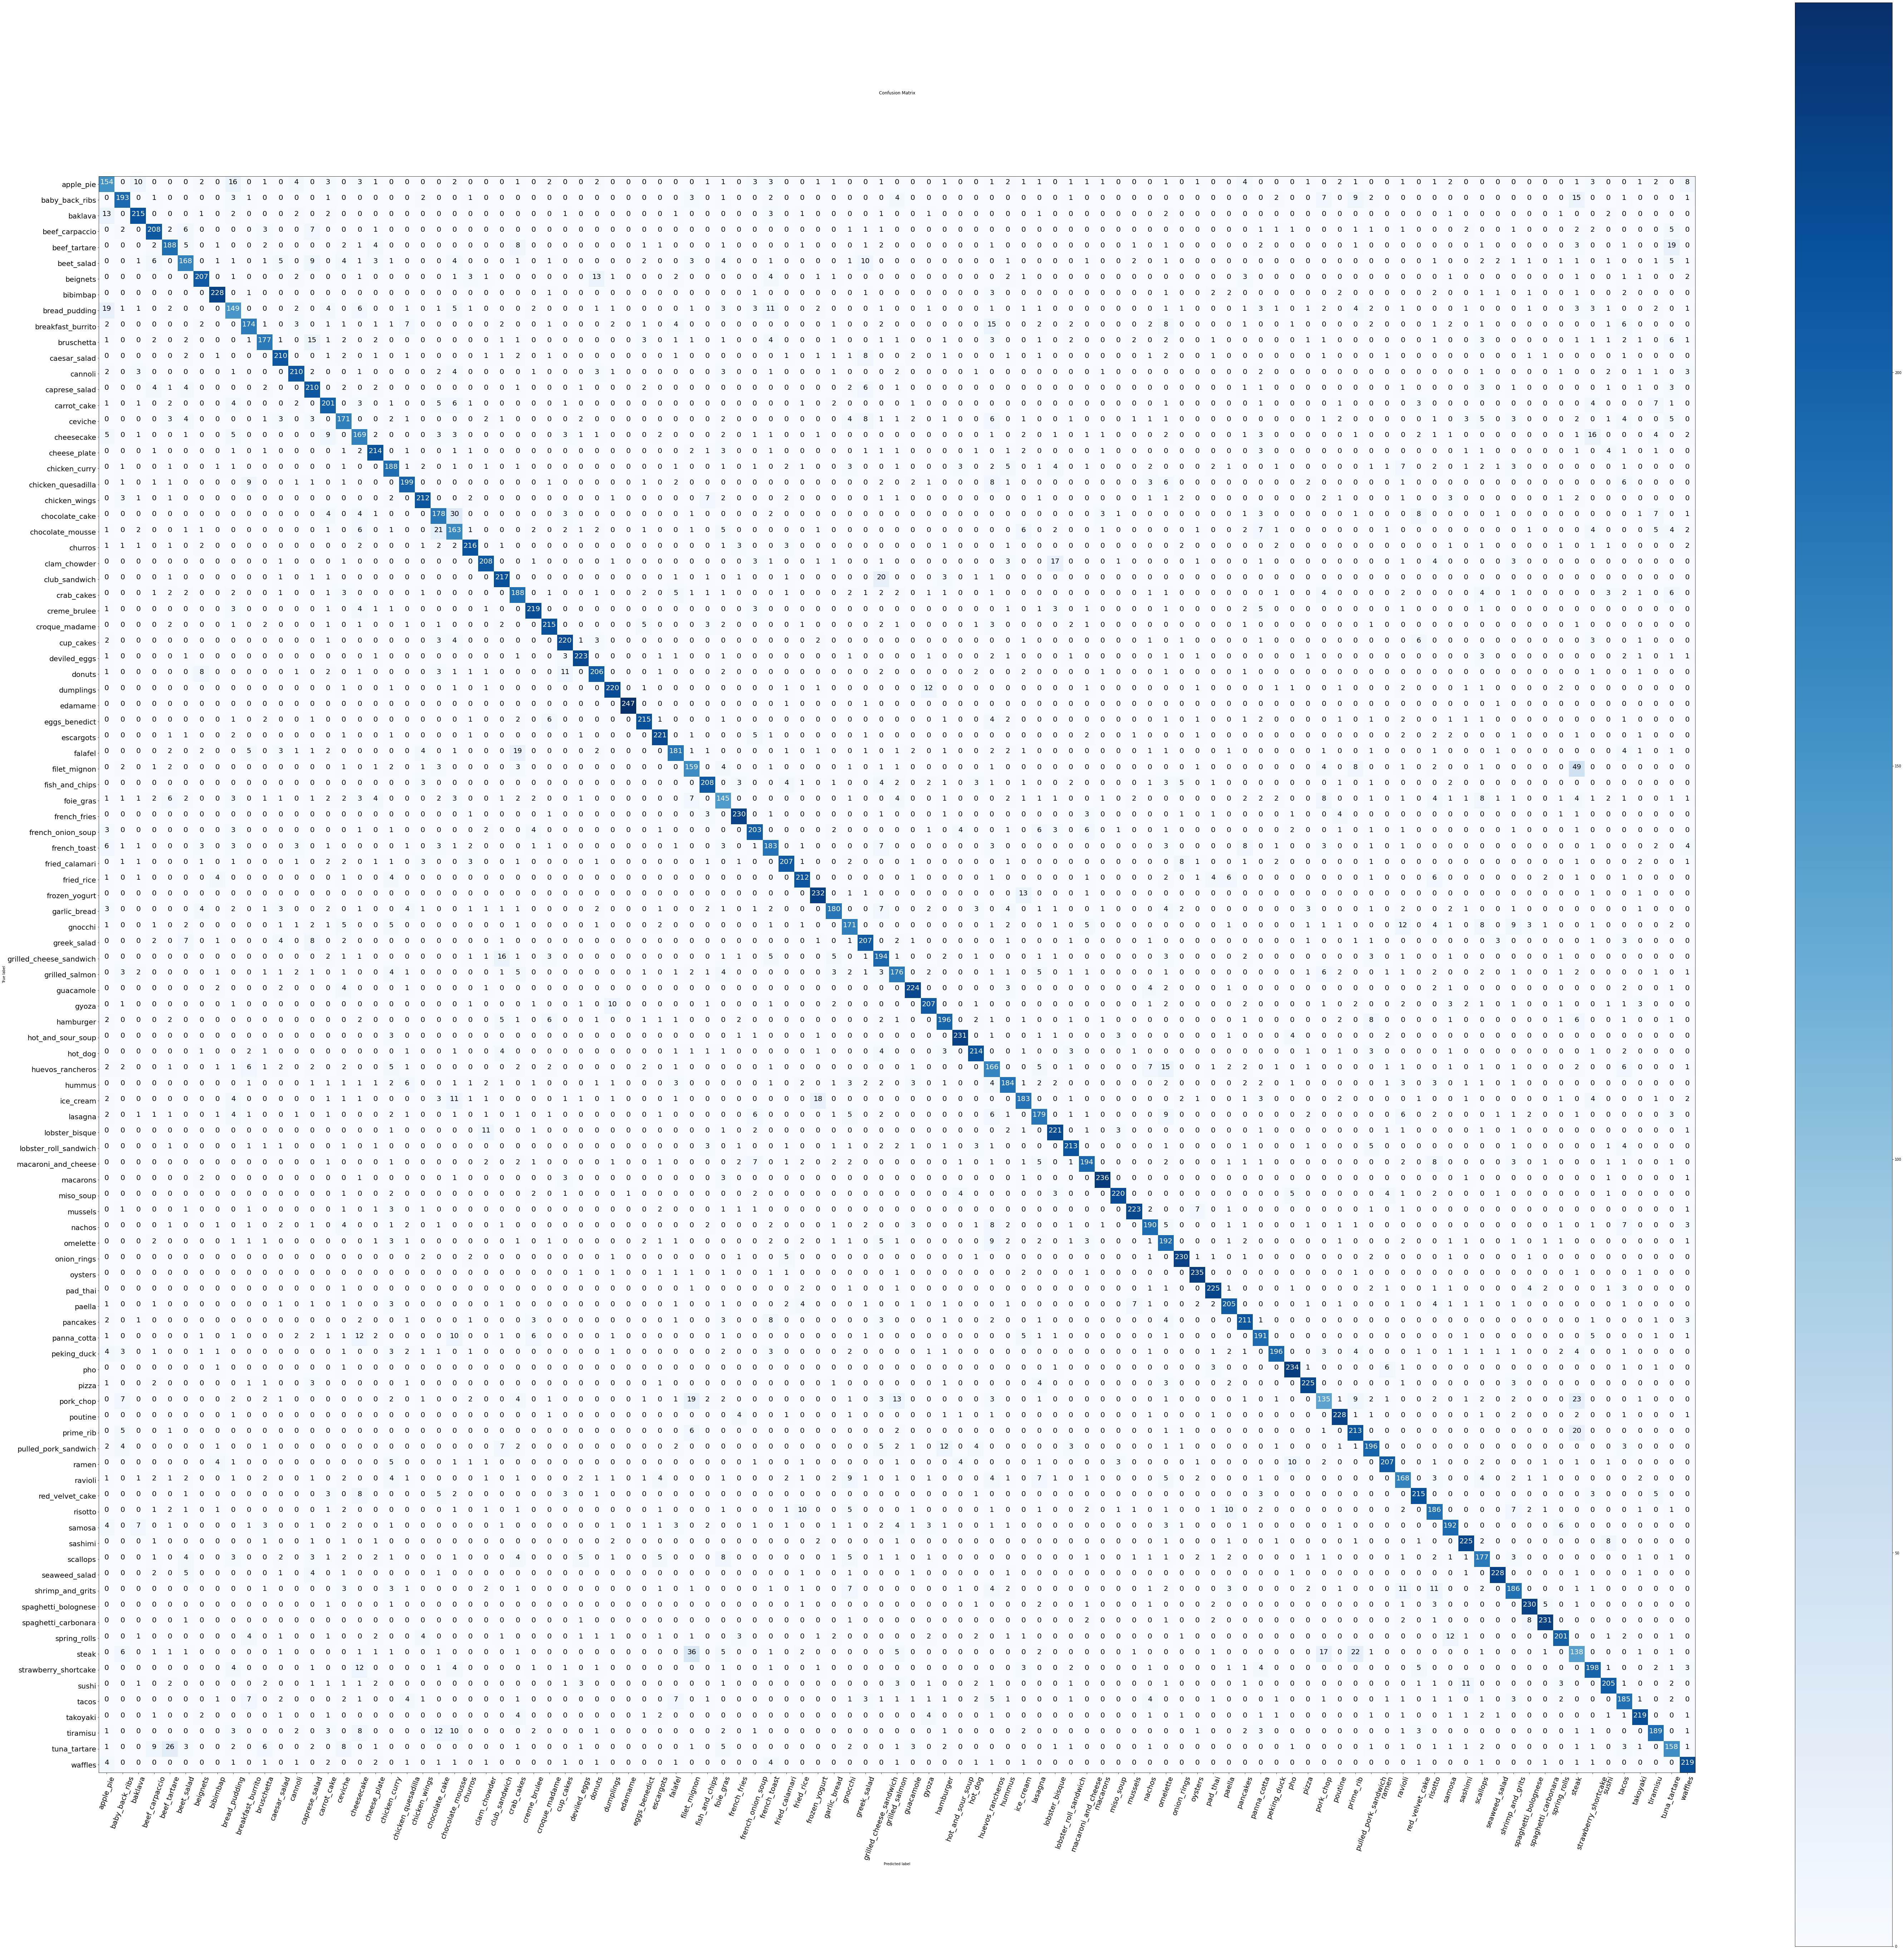

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100,100),
                      text_size=20)

In [ ]:
# 2. Create a DataFrame of different parameters for each of our test images
import pandas as pd
pred_df = pd.DataFrame({"y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": preds_probs.max(axis=1), # get the maximum prediction probability value,
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})

In [ ]:
# 3. Find out in our DataFrame which predictions are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,29,29,0.992381,cup_cakes,cup_cakes,True
1,81,81,0.999886,ramen,ramen,True
2,91,91,0.999969,spaghetti_carbonara,spaghetti_carbonara,True
3,53,53,0.996998,hamburger,hamburger,True
4,97,97,0.997507,takoyaki,takoyaki,True


In [ ]:
# 4. Sort our DataFrame to have most wrong predictions at the top
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
9735,87,30,1.000000,scallops,deviled_eggs,False
15437,56,66,1.000000,huevos_rancheros,nachos,False
13884,46,10,1.000000,garlic_bread,bruschetta,False
16129,65,69,0.999999,mussels,oysters,False
6434,37,21,0.999997,filet_mignon,chocolate_cake,False
7455,43,68,0.999997,fried_calamari,onion_rings,False
22441,16,17,0.999995,cheesecake,cheese_plate,False
1113,72,67,0.999995,pancakes,omelette,False
900,14,29,0.999990,carrot_cake,cup_cakes,False
13486,9,19,0.999989,breakfast_burrito,chicken_quesadilla,False


In [ ]:
# Create a function to load and prepare images
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  specified shape (img_shape, img_shape, color_channels = 3).

  Args:
    filename (str): path to target image
    image_shape (int): height/width dimension of target image size
    scale (bool): scale pixel values from 0 - 255 to 0 - 1 or not

  Returns:
    Image tensor of shape (img_shape, img_shape, 3)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode image into tensor
  img = tf.io.decode_image(img, channels=3)

  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])

  # Scale? Yes/no
  if scale:
    # Rescale the image. (get all values between 0 and 1) -- aka normalization
    return img/255.
  else:
    return img

In [ ]:
# Get all of the image file paths in the test dataset
filepaths = []
for filepath in test_data.list_files("101_food_classes/test_data/*/*.jpg",
                                      shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

InvalidArgumentError: ignored

TypeError: ignored

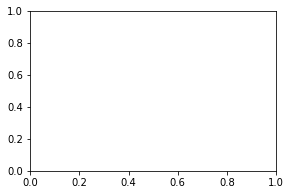

In [ ]:
# 5. Visualize the data samples which have the wrong prediction but highest pred probability
images_to_view = 9
start_index = 20
plt.figure(figsize=[15,10])
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prep_image(row[1],scale=False)
  _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row # only interested in a few parameters in each row
  plt.imshow(img/255.)
  plt.title(f"Actual: {y_true_classname}, Pred: {y_pred_classname} \nProb: {pred_prob}")
  plt.axis(False)